1. Explanatory Dataset

In [1]:
# Import library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, matthews_corrcoef
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import google drive ke google colab

from google.colab import drive

In [ ]:
# connect google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# memasukkan file csv sesuai path di google drive

path = '/content/drive/MyDrive/Metabolic Syndrome/Metabolic Syndrome.csv'

In [ ]:
# Membaca dataset

df = pd.read_csv(path)

In [ ]:
# Tampilkan beberapa baris pertama dataset untuk melihat struktur data

df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [ ]:
# Memeriksa data yang hilang

print(df.isnull().sum())

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


In [ ]:
# Melihat informasi umum tentang dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB
None


In [ ]:
# Melihat statistik deskriptif untuk kolom numerik

print(df.describe())

               seqn          Age       Income    WaistCirc          BMI  \
count   2401.000000  2401.000000  2284.000000  2316.000000  2375.000000   
mean   67030.674302    48.691795  4005.253940    98.307254    28.702189   
std     2823.565114    17.632852  2954.032186    16.252634     6.662242   
min    62161.000000    20.000000   300.000000    56.200000    13.400000   
25%    64591.000000    34.000000  1600.000000    86.675000    24.000000   
50%    67059.000000    48.000000  2500.000000    97.000000    27.700000   
75%    69495.000000    63.000000  6200.000000   107.625000    32.100000   
max    71915.000000    80.000000  9000.000000   176.000000    68.700000   

       Albuminuria      UrAlbCr     UricAcid  BloodGlucose          HDL  \
count  2401.000000  2401.000000  2401.000000   2401.000000  2401.000000   
mean      0.154102    43.626131     5.489046    108.247813    53.369429   
std       0.422780   258.272829     1.439358     34.820657    15.185537   
min       0.000000     1

In [ ]:
# Mengganti nilai kolom '' dari (1, 0) menjadi (Yes, No)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['chol'] = le.fit_transform(df['Marital'])
df['Race'] = le.fit_transform(df['Race'])


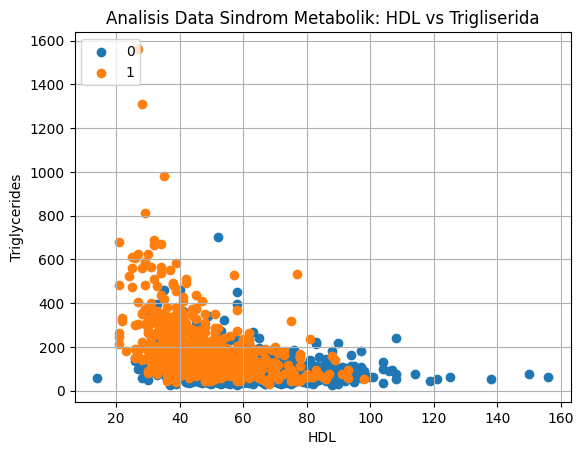

In [ ]:
# Visualisasi Data

fig, ax = plt.subplots()
for Age, d in df.groupby('MetabolicSyndrome'):
  ax.scatter(d['HDL'], d['Triglycerides'], label=Age)

plt.legend(loc='upper left')
plt.title('Analisis Data Sindrom Metabolik: HDL vs Trigliserida')
plt.xlabel('HDL')
plt.ylabel('Triglycerides')
plt.grid(True)
plt.show()

2. Preprocessing Dengan Label Binarizer

In [ ]:
x_train = np.array(df[['HDL', 'Triglycerides']])
y_train = np.array(df['MetabolicSyndrome'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[ 41  84]
 [ 28  56]
 [ 43  78]
 ...
 [ 47  84]
 [ 41 124]
 [ 36 226]]

y_train: [0 0 0 ... 0 1 1]


In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 ... 0 1 1]


3. Training KNN Classification Model

In [ ]:
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

4. Prediksi dengan KNN Classification Model

In [ ]:
#

A_HDL = 40
A_Triglycerides = 20
x_new = np.array([A_HDL, A_Triglycerides]).reshape(1, -1)
x_new

array([[40, 20]])

In [ ]:
y_new = model.predict(x_new)
y_new

array([0])

In [ ]:
lb.inverse_transform(y_new)

array([0])

5. Visualisasi Nearest Neighbours

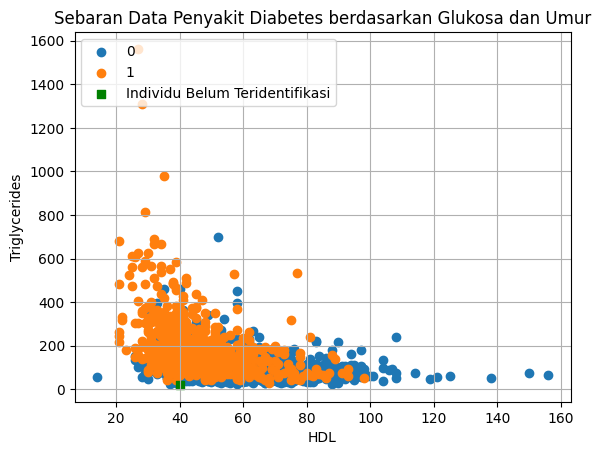

In [ ]:
fig, ax = plt.subplots()
for Age, d in df.groupby('MetabolicSyndrome'):
  ax.scatter(d['HDL'], d['Triglycerides'], label=Age)

plt.scatter(A_HDL,
            A_Triglycerides,
            marker='s',
            color='green',
            label='Individu Belum Teridentifikasi')

plt.legend(loc='upper left')
plt.title('Sebaran Data Penyakit Diabetes berdasarkan Glukosa dan Umur')
plt.xlabel('HDL')
plt.ylabel('Triglycerides')
plt.grid(True)
plt.show()

6. Kalkulasi Distance (Euclidean Distance)

In [ ]:
Misterius = np.array([A_HDL, A_Triglycerides])
Misterius

array([40, 20])

In [ ]:
x_train

array([[ 41,  84],
       [ 28,  56],
       [ 43,  78],
       ...,
       [ 47,  84],
       [ 41, 124],
       [ 36, 226]])

In [ ]:
data_jarak = [euclidean(Misterius, d) for d in x_train]
data_jarak

[64.00781202322104,
 37.94733192202055,
 58.077534382926416,
 125.41929676090518,
 106.04244433244644,
 80.30566605165541,
 29.0,
 71.449282711585,
 55.226805085936306,
 66.27216610312357,
 78.16009211867653,
 162.9969324864735,
 109.0,
 42.42640687119285,
 545.0743068610004,
 27.784887978899608,
 60.207972893961475,
 87.20665112249179,
 142.0563268566381,
 102.25947388873072,
 85.05292469985967,
 172.14238292762187,
 103.75451797391764,
 115.00434774390054,
 48.041648597857254,
 306.1633550900565,
 78.63841300535,
 118.94956914591998,
 203.00246303924493,
 72.78049189171504,
 98.32598842625484,
 63.631753079732135,
 81.54140052758476,
 174.34735443934903,
 44.9221548904324,
 34.132096331752024,
 266.0,
 157.91770008456936,
 73.824115301167,
 69.02897942168927,
 127.4244874425634,
 105.68348972285122,
 158.02847844613325,
 106.38138934982942,
 68.59300255857006,
 98.47842403288143,
 101.07917688624102,
 48.010415536631214,
 108.07404868885037,
 172.07265907168403,
 55.14526271584895,
 

In [ ]:
df['jarak'] = data_jarak
df.sort_values(['jarak'])

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,chol,jarak
392,63697,41,1,Married,6200.0,1,92.1,27.0,0,2.47,6.4,94,37,26,0,1,6.708204
1617,68765,25,1,NaN,300.0,3,81.0,20.1,0,8.67,4.8,98,39,30,0,5,10.049876
2215,71117,32,0,Single,800.0,1,77.7,20.6,0,12.70,3.4,97,50,32,0,3,15.620499
210,63023,25,1,NaN,1000.0,5,77.3,22.4,0,14.92,5.2,85,47,35,0,5,16.552945
1378,67781,41,0,Married,5400.0,2,83.2,22.1,0,4.76,3.7,98,53,31,0,1,17.029386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,70562,52,1,NaN,300.0,5,103.5,24.9,0,3.00,5.4,91,52,700,0,5,680.105874
2196,71062,52,1,Divorced,1000.0,5,114.2,33.4,2,3500.00,8.1,128,29,814,1,0,794.076193
829,65506,50,1,Single,1600.0,3,92.9,27.6,2,844.83,4.2,335,35,979,1,3,959.013034
1016,66268,58,1,Married,9000.0,5,97.6,28.5,0,7.65,4.9,126,28,1311,1,1,1291.055770


7. Evaluasi KNN Classification Model

In [ ]:
#Testing Set
x_test = np.array([[20, 30], [40, 200], [35, 100], [55, 45]])
y_test = lb.transform(np.array(['No', 'Yes', 'No', 'Yes'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test: {y_test}')

x_test:
[[ 20  30]
 [ 40 200]
 [ 35 100]
 [ 55  45]]

y_test: [0 0 0 0]


In [ ]:
# Prediksi terhadap testing set
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0])

8. Evaluasi Model Dengan Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


9. Evaluasi Model Dengan Precission Score

In [ ]:
prec = precision_score(y_test, y_pred)

print(f'Precision: {prec}')

Precision: 0.0


10. Evaluasi Model Dengan Recall Score

In [ ]:
rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


11. Evaluasi Model Dengan F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.0


12. Evaluasi Model Dengan Classification Report

In [ ]:
cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


13. Evaluasi Model Dengan Matthews Correlation Coefficient (MCC)

In [ ]:
mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
